# PROJECT 1 (PART 2)

In [ ]:
# Import libraries - data processing
import pandas as pd
import numpy as np

# Import libraries -  manipulation of files and downloads
import os
from tqdm.notebook import tqdm

# Import libraries - visualitzation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Global variables
YEARS = [2019, 2020, 2021, 2022]

# Definition of the data path in Google Drive
taxi_data_folder = '/content/drive/MyDrive/data'

# Mount Google Drive (only required if running from Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import clean data
df = pd.read_csv(f'{taxi_data_folder}/clean_data.csv')

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,...,pickup_week,pickup_day,pickup_hour,pickup_dayofyear,dropoff_month,dropoff_week,dropoff_day,dropoff_hour,dropoff_dayofyear,trip_duration
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.400,151,239,1,7.0,9.95,2019,...,1,Tuesday,0,1,1,1,Tuesday,0,1,0.111111
1,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.056,148,137,2,8.5,9.80,2019,...,1,Tuesday,0,1,1,1,Tuesday,1,1,0.135278
2,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,12.320,264,264,1,26.0,31.30,2019,...,1,Tuesday,0,1,1,1,Tuesday,1,1,0.489444
3,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.240,249,164,1,7.5,11.40,2019,...,1,Tuesday,0,1,1,1,Tuesday,1,1,0.140833
4,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.072,162,137,2,4.0,5.30,2019,...,1,Tuesday,0,1,1,1,Tuesday,0,1,0.050000


## 02. Visualizations (by years)

### Number of trips by year

Can you answer the question: **Has covid increased / decreased the number of trips made by taxis?**

To answer this question, create a bar figure showing the number of trips per year.

In [ ]:
year, counts = np.unique(df.year, return_counts=True)

In [ ]:
def plot_total_trips_per_year(df, column, xlabel, ylabel, title):
    """
        Display the total number of trips per any.
        :param df: DataFrame with the data of the travels.
        :param column: Column with these data of interest
        :param xlabel: X label
        :param ylabel: Y label
        :param title: Figure title
    """

    _years, _counts = np.unique(df.year, return_counts=True)

    plt.bar(_years, _counts)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(_years)
    plt.show()

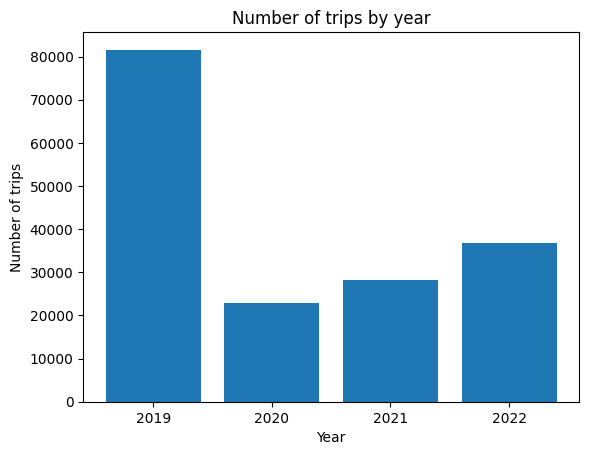

In [ ]:
# Display of the total number of trips per any
plot_total_trips_per_year(df, 'year', 'Year', 'Number of trips', 'Number of trips by year')

<BarContainer object of 4 artists>

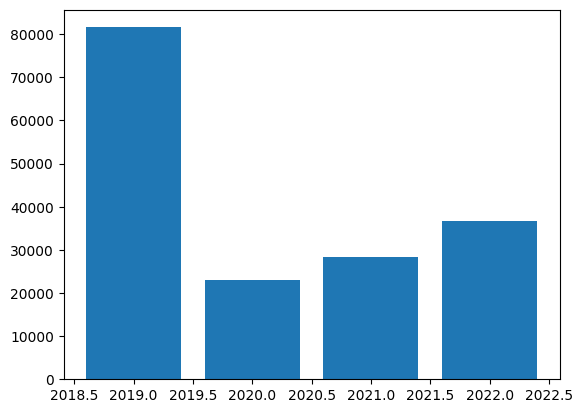

In [ ]:
# alternativa
aux = df.year.value_counts().sort_index()
_year, _counts = aux.index, aux.values
plt.bar(_year,_counts)
# Se puede hacer con groupby, pero segun pablo seria matar moscas a cañonazos

The number of trips per year decreased a lot in 2020, and continued until 2022 lower than the pre-COVID times.

**Question: Is this the behavior you expected? Why?**

Yes, this is an expected outcome because during the pandemic people reduced travelling because of lock downs and also to reduce exposure to COVID.
On the other hand, I did not expect the effect to last as long and as strong as 2022.

Now, you will visualize **how many passengers there are per taxi and per year**.

Create a figure with three subplots (one per year) where can be seen the number of passengers per year.

Then repeat the same chart viewing the % (use the *norm* parameter).

In [ ]:
#mi solucion
def plot_passenger_counts_per_year(df, subplots=True, norm = False):
  """
  Function that displays how many passengers there are per taxi and per year
    :param df: DataFrame with the data of the travels.
    :param norm: If True, shows the percentage.
  """
  #count total trips per year
  passenger_count = df.groupby(by=["year", "passenger_count"]).size()


  if norm: # passengers per year

    passenger_per_year = df.groupby(by=["year"])["passenger_count"].sum()
    passenger_count = passenger_count / passenger_per_year


  passenger_count = passenger_count.reset_index(name="sum")
  passenger_count_pivot = passenger_count.pivot(index="passenger_count", columns="year", values="sum")
  axes = passenger_count_pivot.plot.bar(subplots=subplots, ylabel="passenger_count")#, figsize=(5,10))
  #axes.set_xlabel(axes.get_xlabel)
  return axes

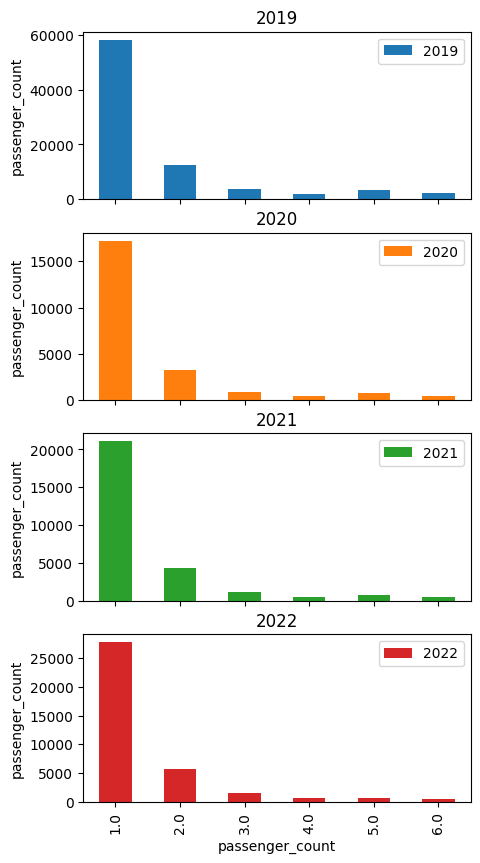

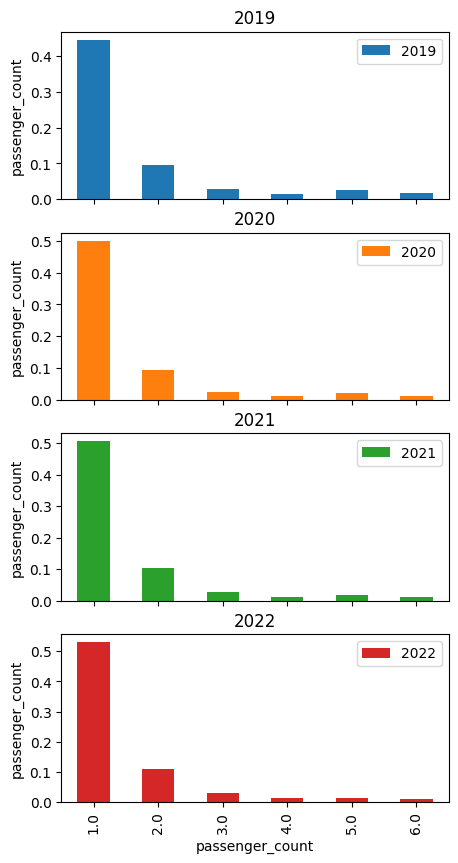

In [ ]:
# Visualization of the recompte of passatgers for any
axes = plot_passenger_counts_per_year(df, norm=False)
figure = axes[0].get_figure()
figure.set_size_inches(5,10)
axes = plot_passenger_counts_per_year(df, norm=True)
figure = axes[0].get_figure()
figure.set_size_inches(5,10)

In the previous figure, you have visualized each year separately. To make the visualization easier to interpret, combine all the information into a graph.

The expected visualization has to contain three columns (different colors) for each number of passengers.

Then repeat the same chart viewing the % (use the *norm* parameter).

In [ ]:
def plot_passenger_counts_combined(df, xlabel, ylabel, norm = False):
    """
    Function that displays how many passengers there are per taxi

     :param df: DataFrame with the travel data.
     :param xlabel: Label for the X axis.
     :param ylabel: Label for the Y axis.
     :param norm: If True, display the percentage instead of the count.
    """

    return NotImplemented

I had not seen this part when I started writing the previous function, and my chance it can do this task too, so I did not rewrite it.

<Axes: xlabel='passenger_count', ylabel='passenger_count'>

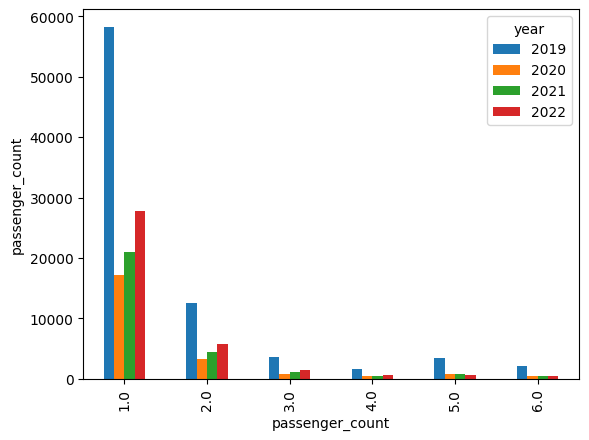

In [ ]:

# Number of trips per number of passengers
plot_passenger_counts_per_year(df, subplots=False, norm=False)

<Axes: xlabel='passenger_count', ylabel='passenger_count'>

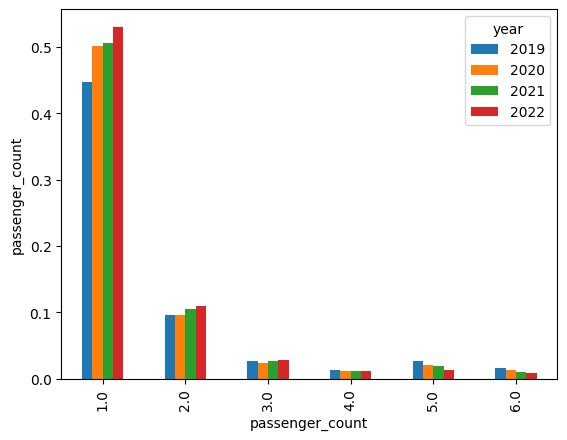

In [ ]:
plot_passenger_counts_per_year(df, subplots=False, norm=True)

**Question: What impact have you seen on the data? Do you think covid had a lot of impact?**

> ANSWER

We see an increase in number in the number of one passenger trips, but not very big. We also see an increase in two passengers trip, and a reduction of 4 5 and 6.
I woudl say covid had an impact, but not very strong.

## 03. Number of trips

So far, you have seen the number of trips there have been in the years studied.

Let's study what changes can be seen if you aggregate the data by hours, days of the week, week of the year, and months.


These visualizations have to be done for the *pick-up* and *drop-off* columns.

Furthermore, the information has to be split by year and represented with dashed lines, and marked with a round or cross wherever the value is.

In [ ]:
#para cada año hay que hacer dos plots, una para pick ups y otra para drop offs

In [ ]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Function that visualizes the number of trips by different data aggregations

     :param df: DataFrame with the travel data.
     :param column: Column where the data of interest is
     :param title: Title of the figure
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
    """

    fig, axes = plt.subplots(ncols=len(columns))
    fig.suptitle(title)
    for idx, column in enumerate(columns):
      # fig, axes = plt.subplots()
      # fig.suptitle(column)
      for year in YEARS: # it is fine to do it like this with a for loop. there is no need to do df.scatter(blabla)
        aux  = df.loc[df.year == year, column].value_counts().sort_index()
        #! Con dias de la semana sort_index() no va a funcionar. Hay que definir una lista

        axes[idx].scatter(aux.index, aux.values, label=year) #las series tienen indices y valores
        axes[idx].plot(aux.index, aux.values, linestyle="--", alpha=0.5)

      # axes.legend()
      axes[idx].set_xlabel(xlabel)
      axes[idx].set_ylabel(ylabel)
      axes[idx].set_title(column)

    # legend only once
    axes[idx].legend(loc="upper left", bbox_to_anchor=(1, 1))
    return fig, axes

In [ ]:
columns = ['pickup_month', 'dropoff_month']
fig_in_width, fig_in_height =12, 5

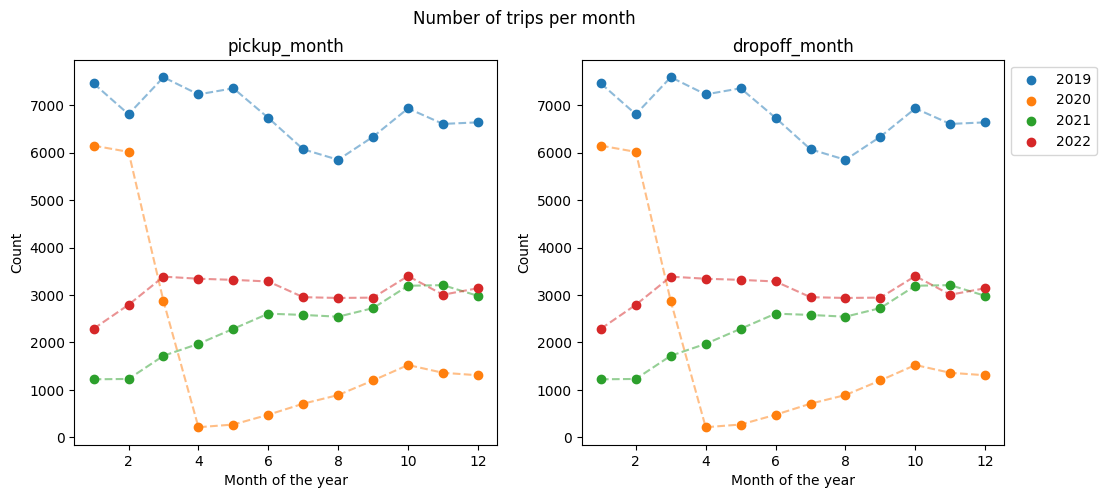

In [ ]:
fig, axes = visualize_trips(df, ['pickup_month', 'dropoff_month'], title = 'Number of trips per month', xlabel = 'Month of the year', ylabel = 'Count')
fig.set_size_inches(fig_in_width, fig_in_height)

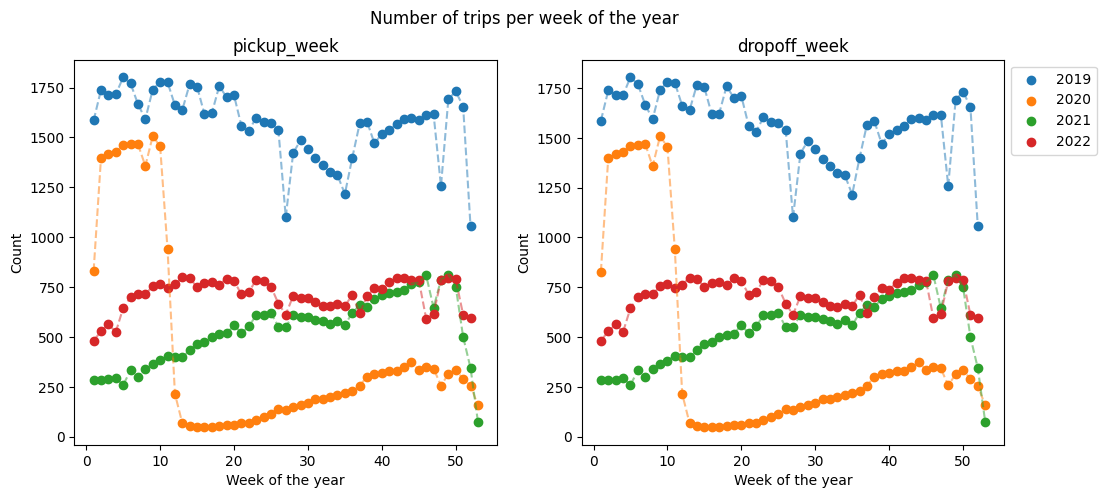

In [ ]:
fig, axes= visualize_trips(df, ['pickup_week', 'dropoff_week'], title = 'Number of trips per week of the year', xlabel = 'Week of the year', ylabel = 'Count')
fig.set_size_inches(fig_in_width, fig_in_height)

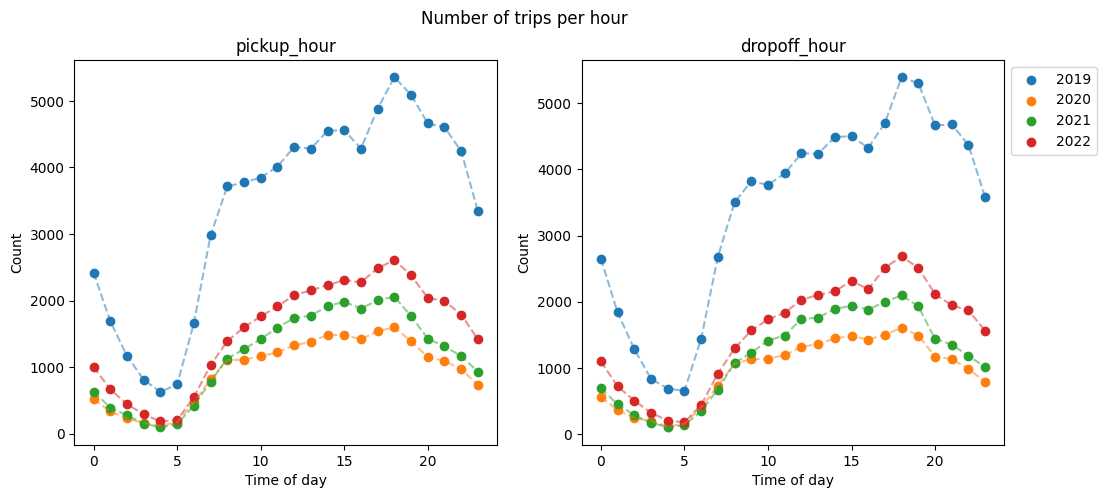

In [ ]:
fig, axes = visualize_trips(df, ['pickup_hour', 'dropoff_hour'], title = 'Number of trips per hour', xlabel = 'Time of day', ylabel = 'Count')
fig.set_size_inches(fig_in_width, fig_in_height)

<ipython-input-337-4c2b2b5773d5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


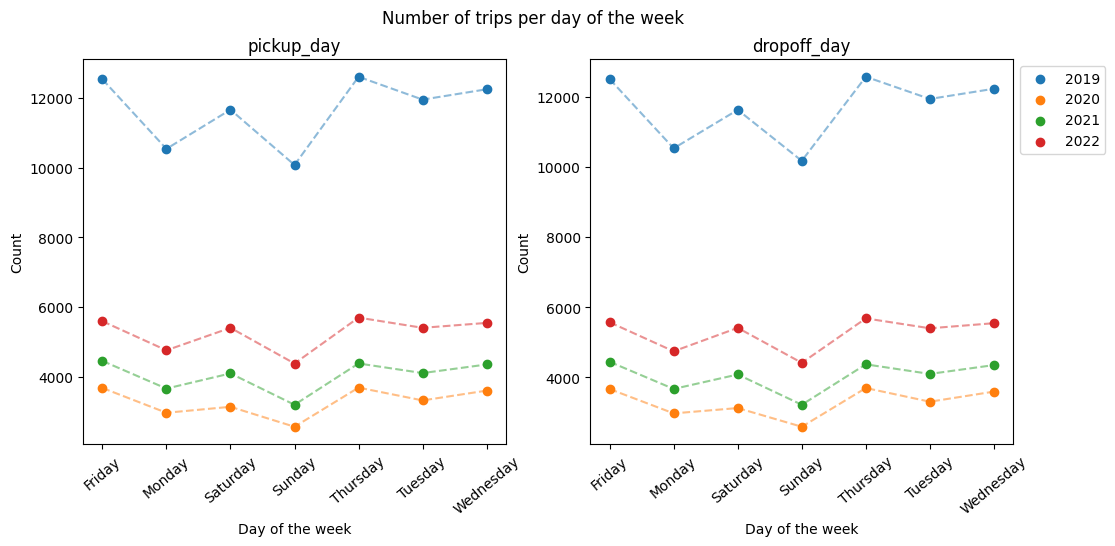

In [ ]:
fig, axes = visualize_trips(df, ['pickup_day', 'dropoff_day'], title = 'Number of trips per day of the week', xlabel = 'Day of the week', ylabel = 'Count')
fig.set_size_inches(fig_in_width, fig_in_height)
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

**Question: What behaviors do you see in each case? What do you think is the reason?**

> ANSWER

>The most clear thing to observe is the drop of trips in 2020 march - april, which can be seen in the month (3-4) and week (~10) of the year plots.
Regarding time of the day, there is a general reduction of number of trips compared to 2019, which looks that mighe be more severe during the day. To conclude more accurate about the effect it would be nice to normalize the data.
There seems to be no major effect for the trips depending on day of the week.

## 04. Distance/duration and speed relationship

In the data, there is the distance traveled by taxis on each trip. Furthermore, you can extract the duration of the trips using: *tpep_dropoff_datetime* and *tpep_pickup_datetime*.

Now, you will find out how covid affected the distances and durations of journeys along with the speed of taxis.

Do you think the traffic density changed?

### 04.1 Histograms

Visualize the **histograms** of distance and duration per year.

You can use *plt.hist()* or *plt.bar()* function.

In [ ]:
from scipy.stats import zscore

def visualize_histograms(df, column, title, xlabel, ylabel, xlim, remove_outliers=False):
    """
    Function that creates a histogram from the information contained in the column *column* of the dataframe *df*
    :param df: DataFrame with the travel data.
     :param column: Column where the data of interest is
     :param title: Title of the figure
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param xlim: limits of the figure on the X axis
    """

    if remove_outliers:
      z_scores = zscore(df[column])
      df = df[(z_scores < 3) & (z_scores > -3)]

    fig, axes = plt.subplots(ncols=len(YEARS))
    for idx, year in enumerate(YEARS):
      df[df["year"]==year][column].plot.hist(bins=100, ax=axes[idx])#, title=title, xlabel=xlabel, ylabel=ylabel)
      year_median=df[df["year"]==year][column].median()
      axes[idx].axvline(year_median, color="red", linestyle="--", label="median", alpha=0.5)
      axes[idx].set_xlabel(xlabel)
      axes[idx].set_ylabel(ylabel)
      axes[idx].set_title(year)
      axes[idx].set_xlim(xlim)
      # add legend
      #axes[idx].text(year_median, f'Median: {year_median:.2f}', color='red')
      #axes[idx].legend(loc="upper left", bbox_to_anchor=(1, 1))
    fig.suptitle(title)
    #plt.show()

    return fig, axes

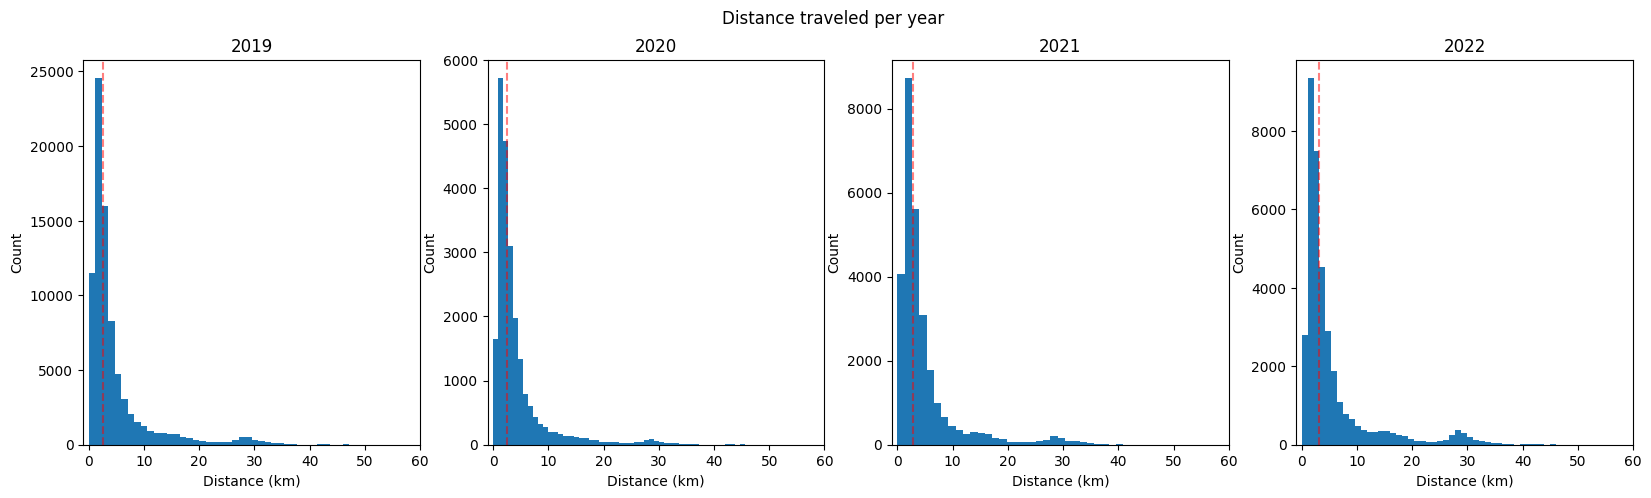

In [ ]:
fig, axes = visualize_histograms(df, 'trip_distance', title = 'Distance traveled per year',
                     xlabel = 'Distance (km)', ylabel = 'Count', xlim = (-1, 60))
fig.set_size_inches(20, fig_in_height)


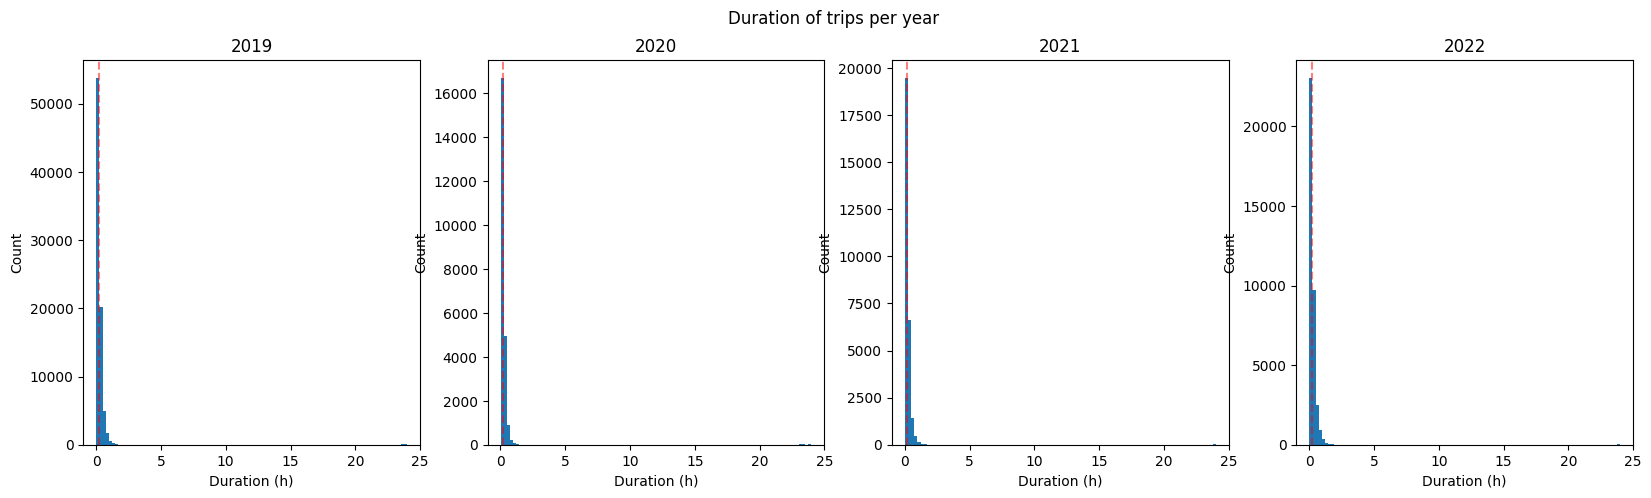

In [ ]:
fig, axes = visualize_histograms(df, 'trip_duration', title = 'Duration of trips per year',
                     xlabel = 'Duration (h)', ylabel = 'Count', xlim = (-1, 25) )
fig.set_size_inches(20, fig_in_height)

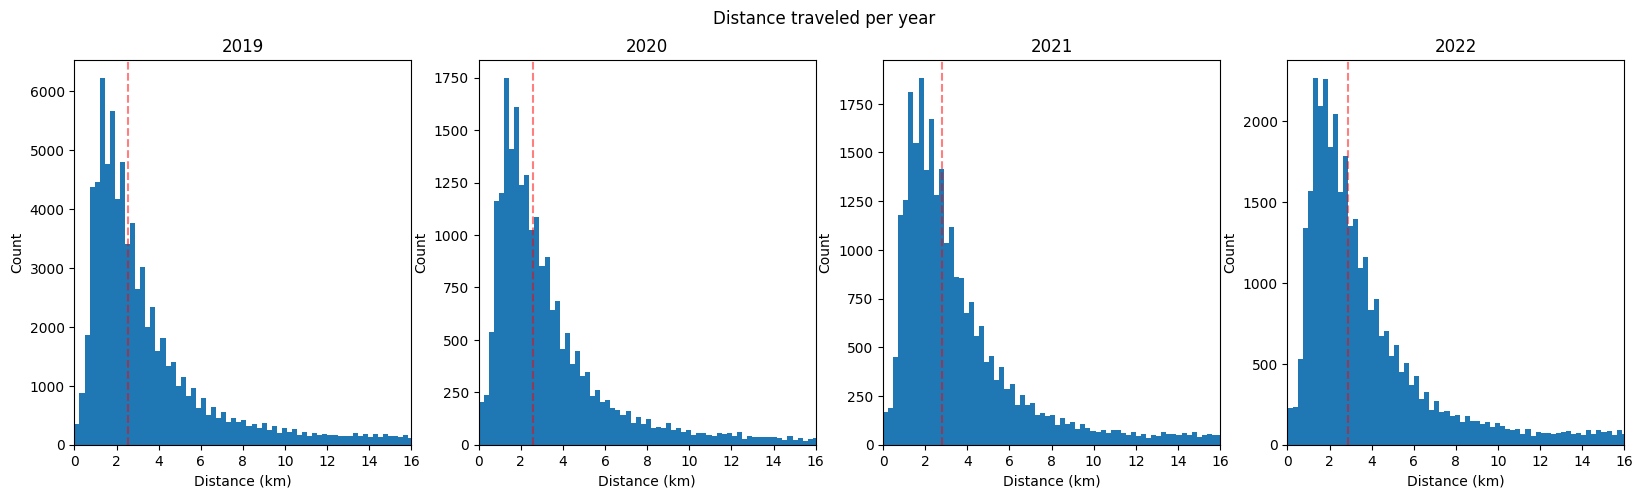

In [ ]:
fig, axes = visualize_histograms(df, 'trip_distance', title = 'Distance traveled per year',
                     xlabel = 'Distance (km)', ylabel = 'Count', xlim = (0, 16), remove_outliers = True)
fig.set_size_inches(20, fig_in_height)

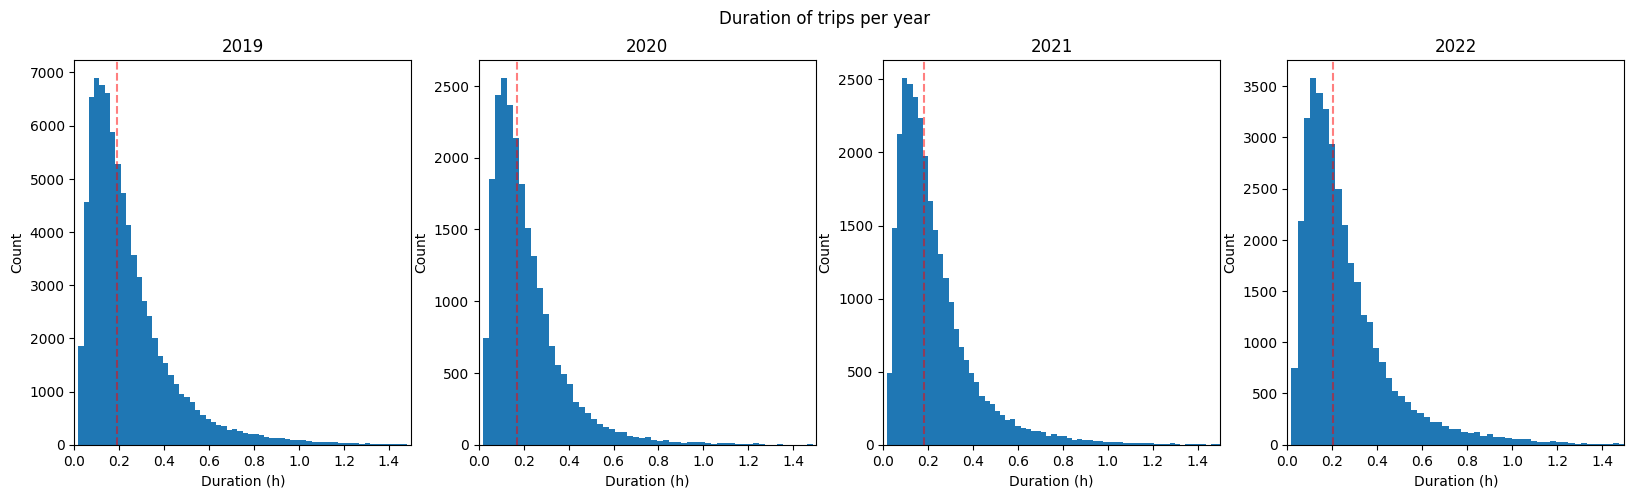

In [ ]:
fig, axes = visualize_histograms(df, 'trip_duration', title = 'Duration of trips per year',
                     xlabel = 'Duration (h)', ylabel = 'Count', xlim = (0, 1.5), remove_outliers = True)
fig.set_size_inches(20, fig_in_height)

Speed calculation:

In [ ]:
df["speed"]=df["trip_distance"]/df["trip_duration"]

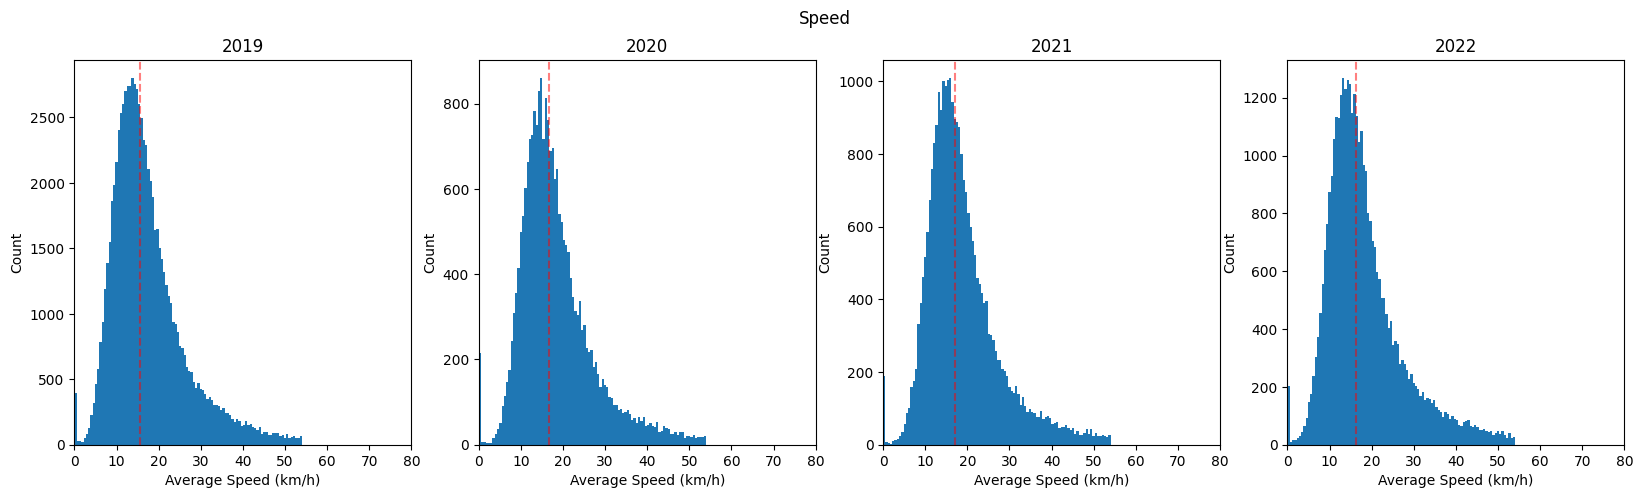

In [ ]:
fig, axes = visualize_histograms(df, 'speed', title = 'Speed',
                     xlabel = 'Average Speed (km/h)', ylabel = 'Count', xlim = (0, 80), remove_outliers = True)
fig.set_size_inches(20, fig_in_height)

The distance from Manhtatan to JFK and Newark Airport is about 30km. Let's see if these distance ranges have been reduced:

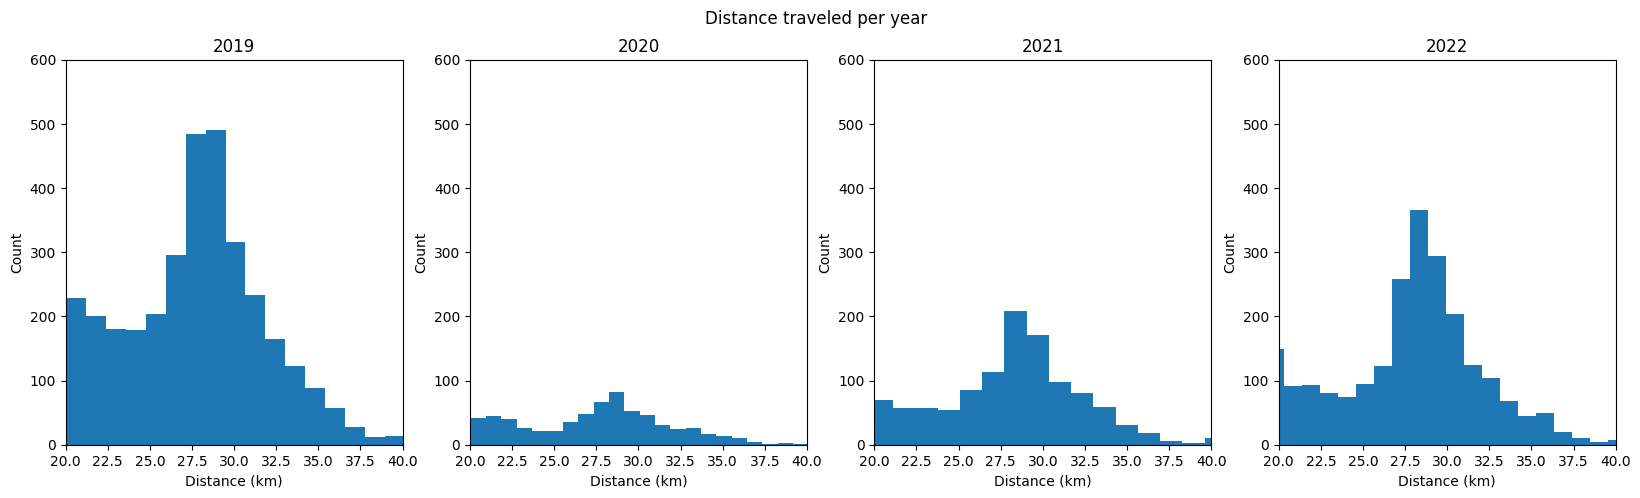

In [ ]:
fig, axes = visualize_histograms(df, 'trip_distance', title = 'Distance traveled per year',
                     xlabel = 'Distance (km)', ylabel = 'Count', xlim = (20, 40))
for ax in axes:
  ax.set_ylim(0, 600)
fig.set_size_inches(20, fig_in_height)

**QUESTIONS:**

* How do you think covid affected travel distances and durations?

* And the speed of taxis?

>**ANSWER**

Yes the traffic changed: it was much less. Therefore the speed but not dramatically. The median seems to be around 15km/h in 2019 and about 18 km/h in 2020.

The distances overall seem not to have changed a lot, but wee observe a peak at around 30km that decreased in 2020. Most likely these are trips to and from JFK and other airports. Flight travelling was reduced during COVID.

### 04.2 Scatter plot and correlation

Create scatter plots to illustrate the relationship between trip duration and distance.

It is possible that the data contain samples outside the distribution (outliers). In this case, skip this samples and display the figure again.

To see if any correlation exists, it is interesting to use the *sns.regplot()* function.

In [ ]:
import seaborn as sns

In [ ]:
def scatter_plot(df, x_value, y_value, xlabel, ylabel, remove_outliers = False):
    """
    Function that displays a scatter plot given the name of the columns that contains the information
     :param df: DataFrame with the travel data.
     :param x_value: Name of the column where the values are
     :param y_value: Name of the column where the values are
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param remove_outliers:
    """
    if remove_outliers:
      df = df[df[y_value]<5]
    ax = sns.regplot(data=df, x=x_value, y=y_value)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

<Axes: xlabel='Distance (km)', ylabel='Duration (h)'>

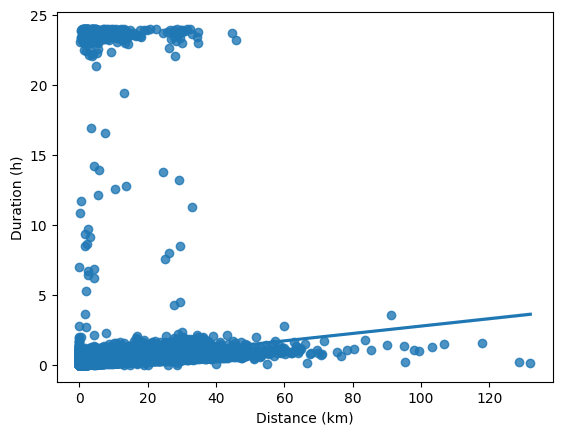

In [ ]:
scatter_plot(df, 'trip_distance', 'trip_duration', 'Distance (km)', 'Duration (h)')

It is challenging to detect real outliers. Here we have considered trips longer than 5h. Ideally this variable could be introduced as a parameter to the function.

<Axes: xlabel='Distance (km)', ylabel='Duration (h)'>

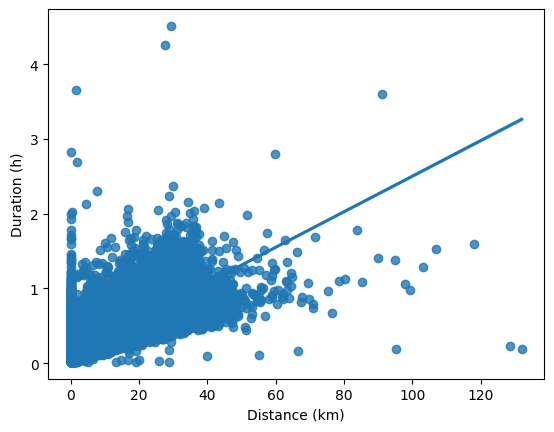

In [ ]:
scatter_plot(df, 'trip_distance', 'trip_duration', 'Distance (km)', 'Duration (h)', True)

**Question: Can you see any relationship? Can you calculate the correlation between the data to get more information?**

> ANSWER

In [ ]:
x = df["trip_distance"]
y = df["trip_duration"]
df_clean = df[df["trip_duration"]<5]
x_clean = df_clean["trip_distance"]
y_clean = df_clean["trip_duration"]

In [ ]:
r = np.corrcoef(x, y)
print("The correlation before removing outliers is ", r[1][0])
clean_r = np.corrcoef(x_clean, y_clean)
print("The correlation after removing outliers is ", clean_r[1][0])


The correlation before removing outliers is  0.15964297111275605
The correlation after removing outliers is  0.783096993962125


Clearly there is a linear relationship between the two, as expected from logic. We can see it is strong after removing theoutliers.

As you did in section 3, visualize the time and distance data for the weeks and months of the year.

In [ ]:
def visualize_per_period(df, column_data, columns, xlabel, ylabel, title):
    """
    Function that show the distance / duration of trips in the time determined
     :param df: DataFrame with the travel data.
     :param column_data: Name of the column where the values are
     :param columns: Name of the columns (pickup, dropoff)
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param title: Title of the figure
    """
    fig, axes = plt.subplots(ncols=len(columns))
    fig.suptitle(title)
    for idx, column in enumerate(columns):
      # fig, axes = plt.subplots()
      # fig.suptitle(column)
      data  = df.groupby(by=["year", column])[column_data].median().reset_index(name="mean_value")
      sns.lineplot(x=column, y="mean_value", hue='year', data=data, palette=sns.color_palette(n_colors=len(YEARS)), ax=axes[idx])


      # axes.legend()
      axes[idx].set_xlabel(xlabel)
      axes[idx].set_ylabel(ylabel)
      axes[idx].set_title(column)

    # legend only once
    axes[idx].legend(loc="upper left", bbox_to_anchor=(1, 1))

    return fig, axes

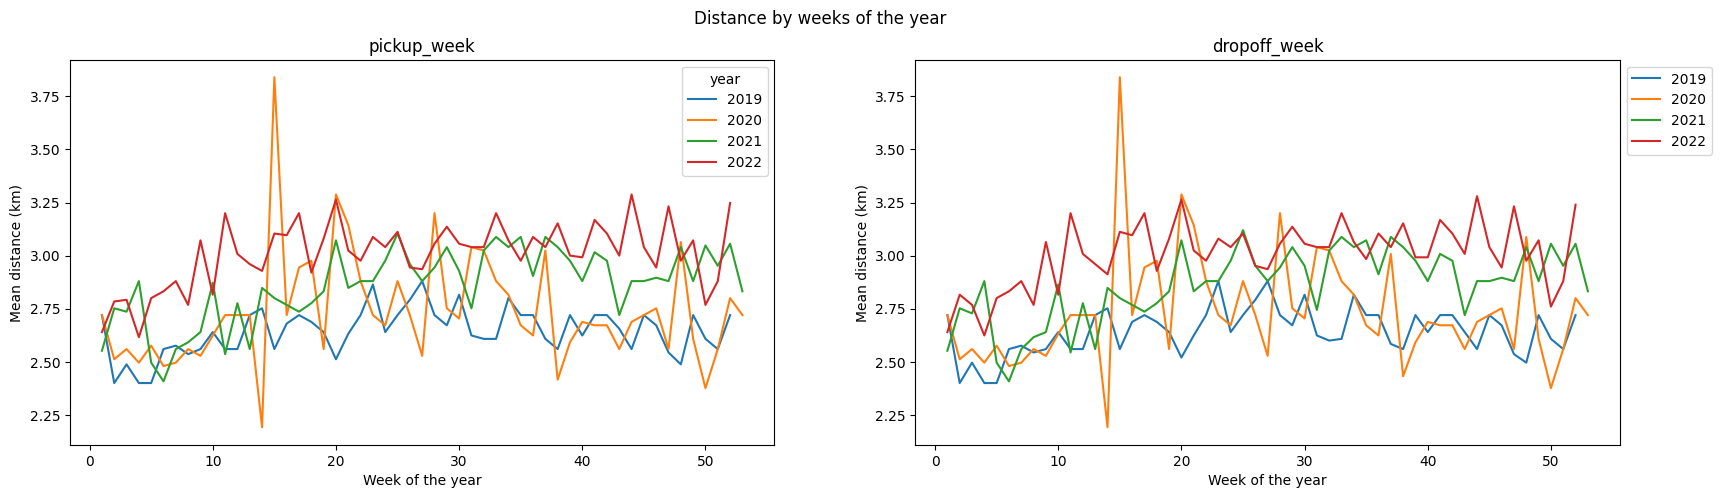

In [ ]:
fig, axes = visualize_per_period(df, 'trip_distance', columns = ['pickup_week', 'dropoff_week'],
                    xlabel = 'Week of the year', ylabel = 'Mean distance (km)', title = 'Distance by weeks of the year')
fig.set_size_inches(20, fig_in_height)

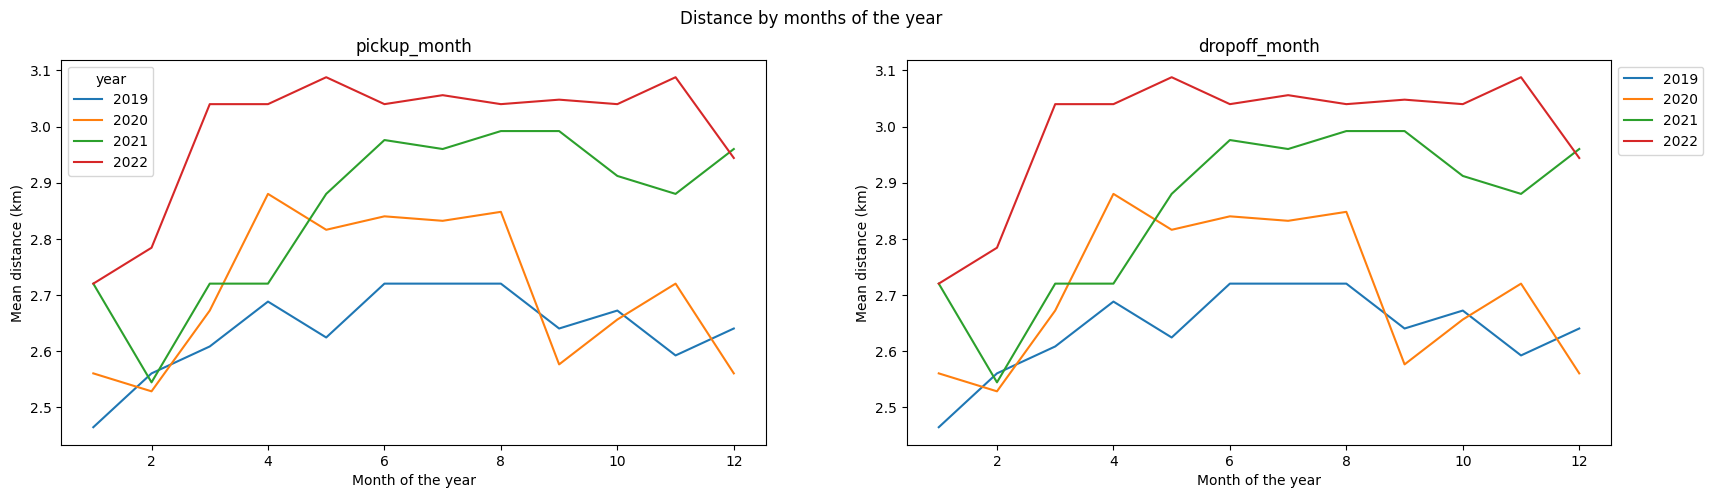

In [ ]:
fig, axes = visualize_per_period(df, 'trip_distance', columns = ['pickup_month', 'dropoff_month'],
                     xlabel = 'Month of the year', ylabel = 'Mean distance (km)', title = 'Distance by months of the year')
fig.set_size_inches(20, fig_in_height)

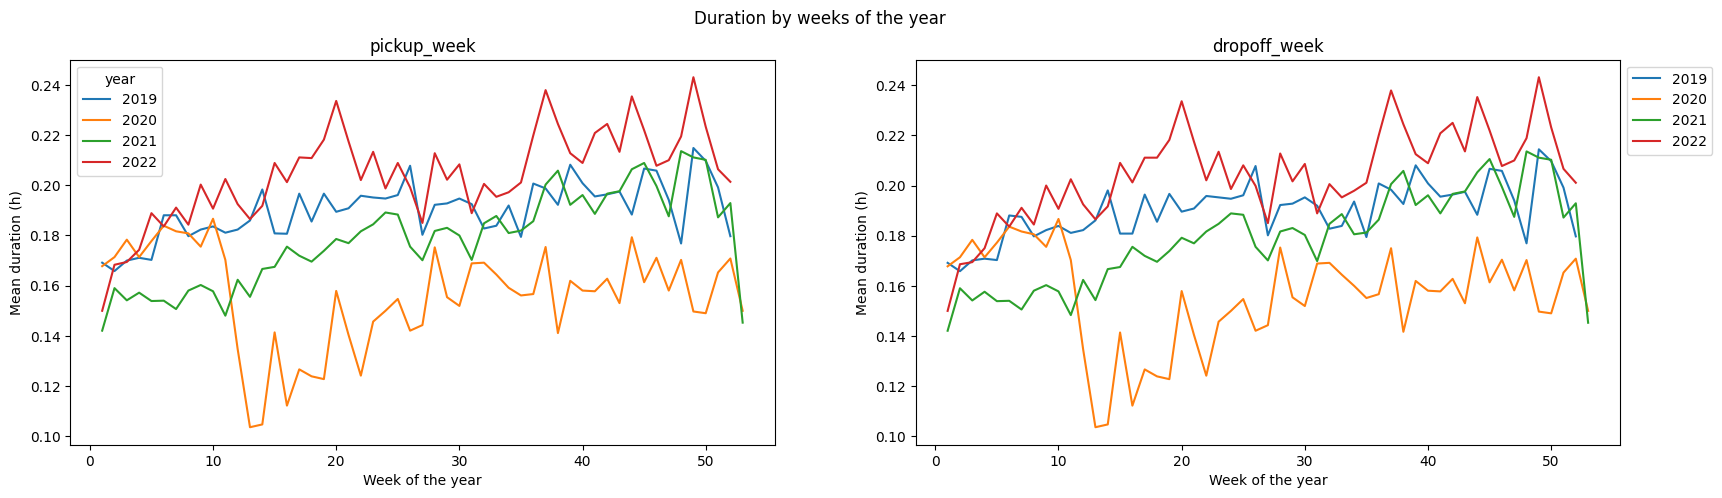

In [ ]:
fig, axes = visualize_per_period(df, 'trip_duration', columns = ['pickup_week', 'dropoff_week'],
                     xlabel = 'Week of the year', ylabel = 'Mean duration (h)', title = 'Duration by weeks of the year')
fig.set_size_inches(20, fig_in_height)

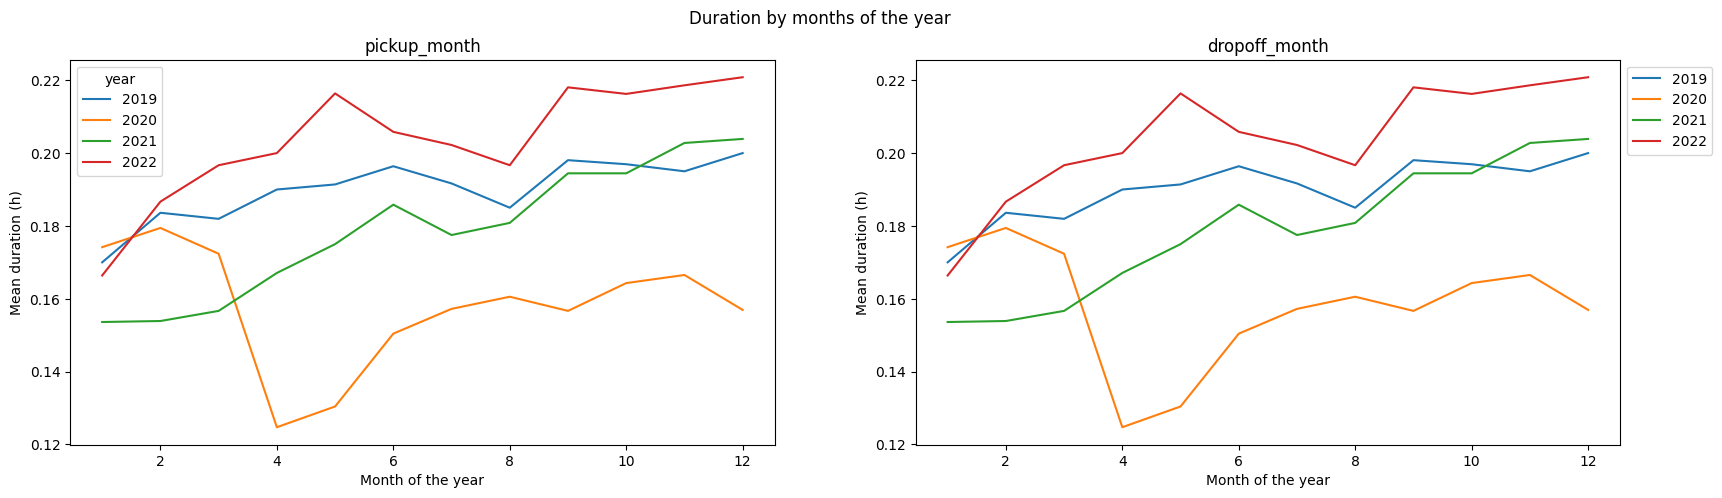

In [ ]:
fig, axes = visualize_per_period(df, 'trip_duration', columns = ['pickup_month', 'dropoff_month'],
                     xlabel = 'Month of the year', ylabel = 'Mean duration (h)', title = 'Duration by months of the year')
fig.set_size_inches(20, fig_in_height)

**Question: Is there any strange behavior apart from covid? What can it be caused by?**

> ANSWER

I do not see any strange behavior apart from covid. The only pattern I see is that in January people travel shorter distances, which could be related to a combination of the factors: weather and holiday season, where people travel less often for longer distances.


### 04.3 Heatmaps

So far, you have shown the data by aggregating different information.

Now, you have to visualize the data like images. For that, you will use the *plt.imshow()* function which displays images and arrays.

Implement a function that displays heatmaps by year (each function display 3 heatmaps, one per year):

- a heatmap showing what time of day are the longest trips during the year.
- a heatmap showing what time of day are the longest trips during the week.

In [ ]:
def heatmap(df, group, column_data, xlabel, ylabel, columns = None, remove_outliers=False):
    """
    Function that aggregates data appropriately to display a heatmap
     :param df: DataFrame with the data
     :param group: Set of values we want to display
     :param column_data: Name of the column where the values are
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param columns: For the case of days of the week
    """

    if remove_outliers:
      z_scores = zscore(df[column_data])
      df = df[(z_scores < 3) & (z_scores > -3)]

    #axes of the image will be group (and column data?)
    if columns:
      fig, axes = plt.subplots(ncols=len(YEARS))
    else:
      fig, axes = plt.subplots(nrows=len(YEARS))

    fig.suptitle(column_data)

    for idx, year in enumerate(YEARS):
      df_year = df[df.year == year]

      data = df_year.groupby(by=group).mean(numeric_only=True)[column_data].unstack().fillna(0).values

      axes[idx].imshow(data)

      axes[idx].set_xlabel(xlabel)
      axes[idx].set_ylabel(ylabel)
      axes[idx].set_title(year)
      if columns:
        axes[idx].set_xticks(np.arange(len(columns)))
        axes[idx].set_xticklabels(columns, rotation=90)
      #plt.show()

    return fig, axes

In [ ]:
#solucion alternativa con pivot table
fig_in_width, fig_in_height = 15, 10

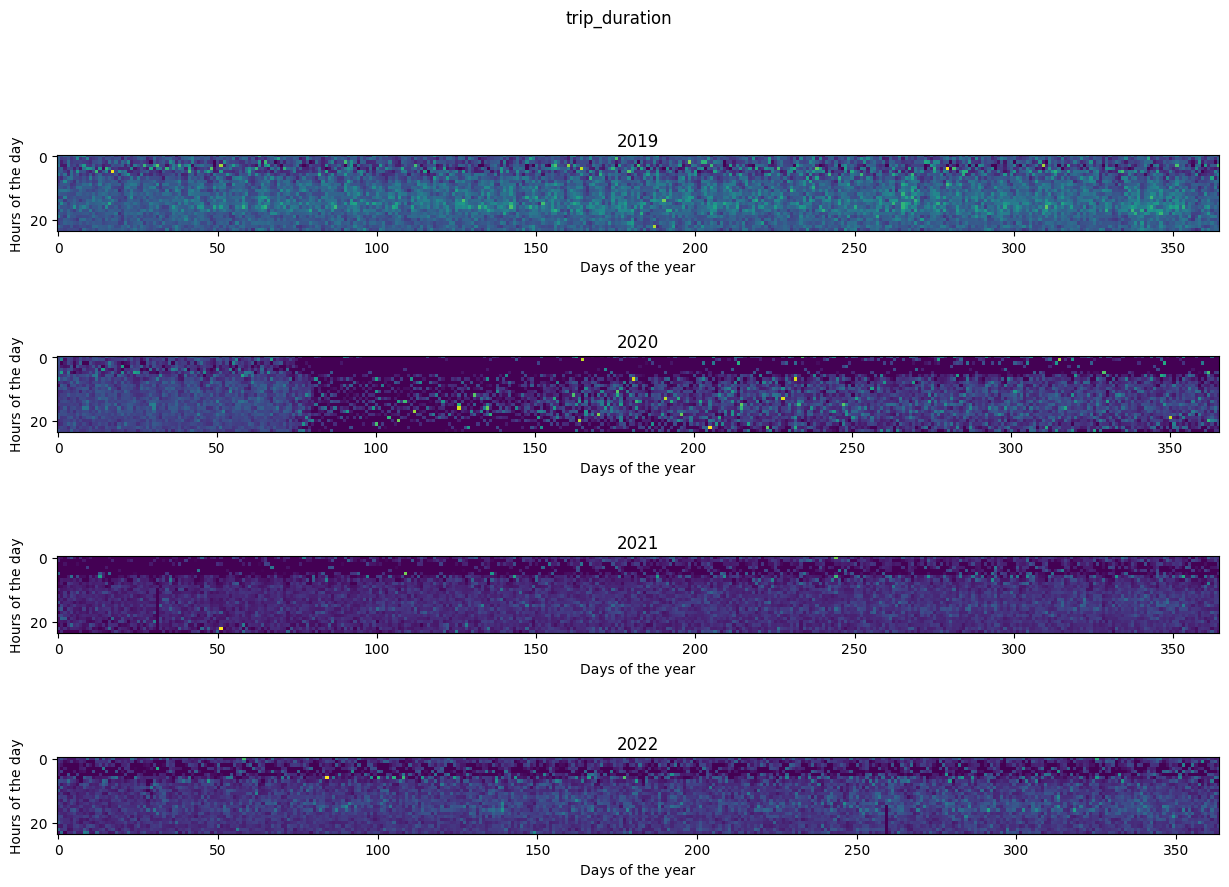

In [ ]:
fig, axes = heatmap(df, ['pickup_hour', 'pickup_dayofyear'], 'trip_duration', 'Days of the year', 'Hours of the day', remove_outliers=True)
fig.set_size_inches(fig_in_width, fig_in_height)

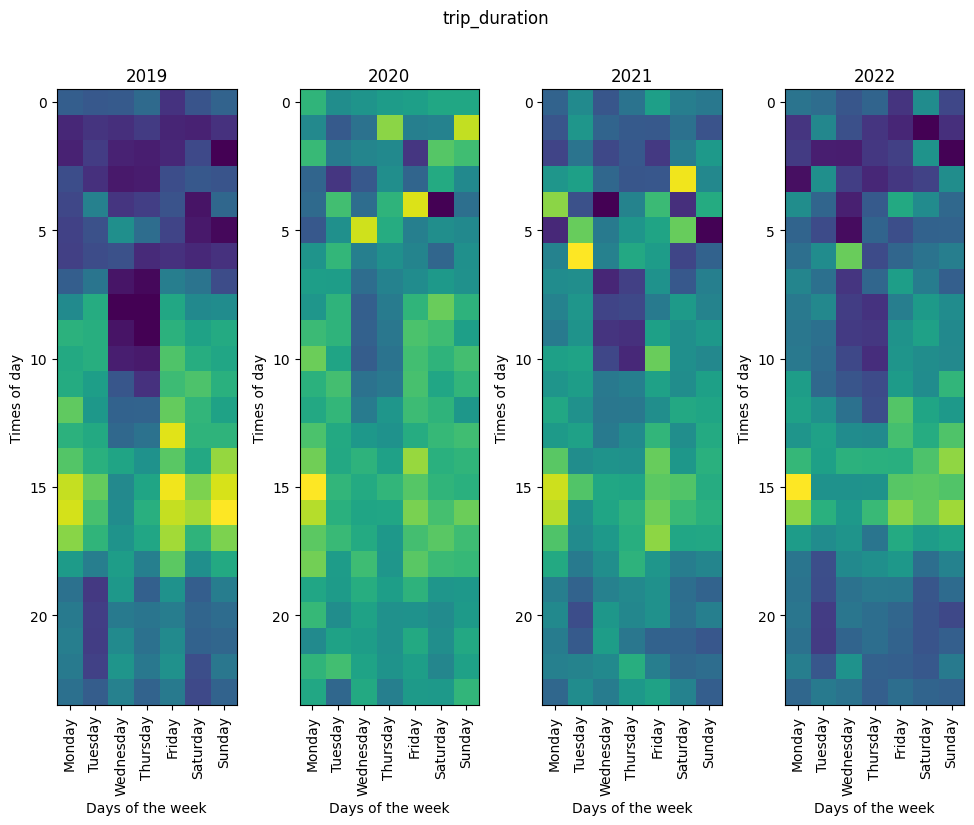

In [ ]:
weekday_cols = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axes = heatmap(df, ['pickup_hour', 'pickup_day'], 'trip_duration', 'Days of the week', 'Times of day', weekday_cols, remove_outliers=True)
fig.set_size_inches(12, 8)

Repeat the previous heatmaps visualizing the distance.

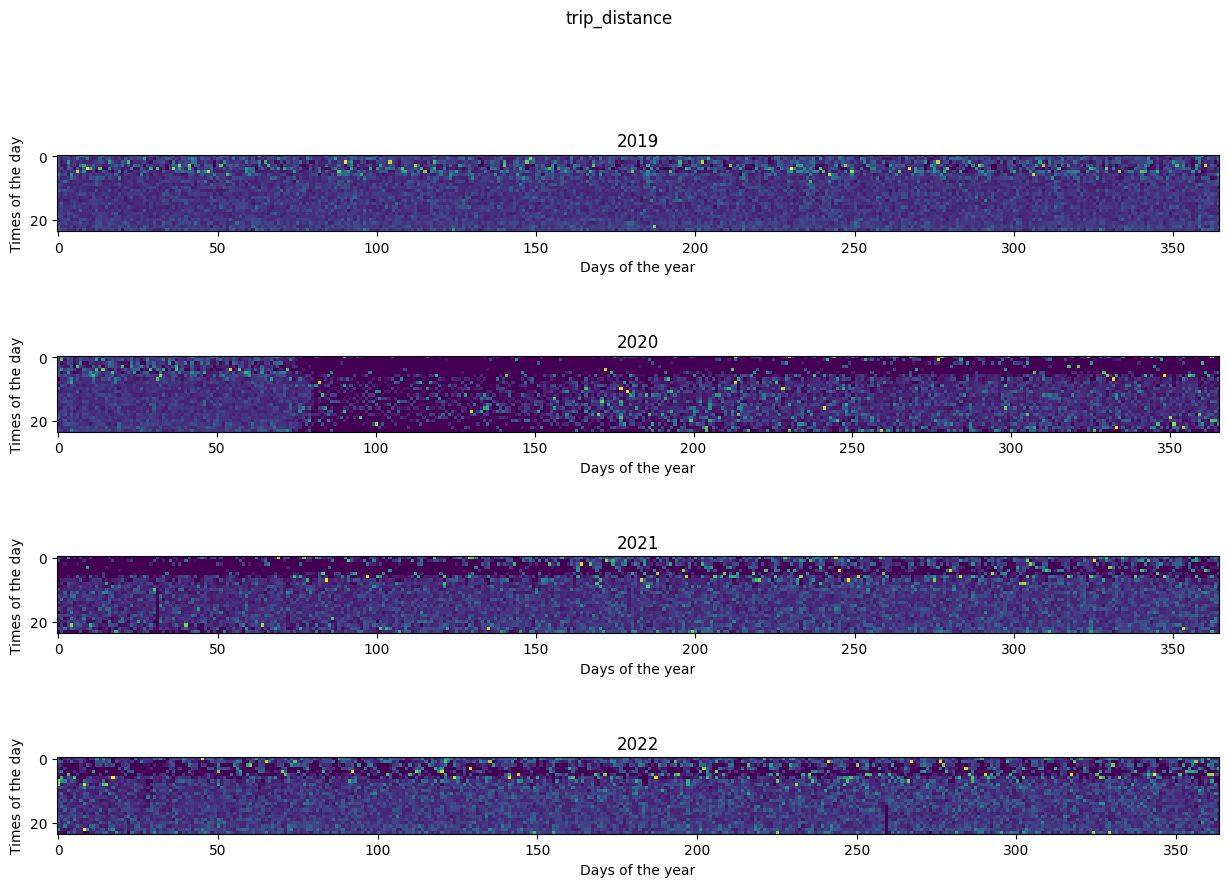

In [ ]:
fig, axes = heatmap(df, ['pickup_hour', 'pickup_dayofyear'], 'trip_distance', 'Days of the year', 'Times of the day', remove_outliers=True)
fig.set_size_inches(fig_in_width, fig_in_height)

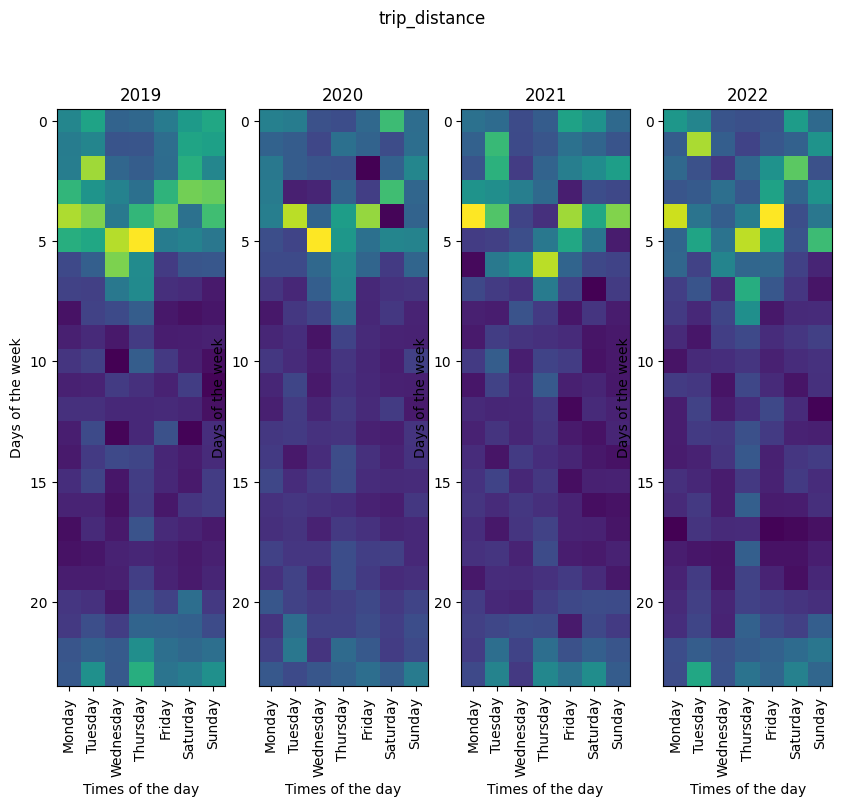

In [ ]:
weekday_cols = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axes = heatmap(df, ['pickup_hour', 'pickup_day'], 'trip_distance', 'Times of the day', 'Days of the week', weekday_cols, remove_outliers=True)
fig.set_size_inches(10, 8)

Finally, view the average speed at different times of the day during the week.

In [ ]:
def speed_heatmap(df, group, xlabel, ylabel, columns = None):
    """
    Function that aggregates data appropriately to display a speed heatmap
     :param df: DataFrame with the travel data.
     :param group: Set of values we want to display
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param columns: For the case of days of the week
    """

    return NotImplemented

We can resuse the heatmap function.

In [ ]:
df["speed"]=df["trip_distance"]/df["trip_duration"]

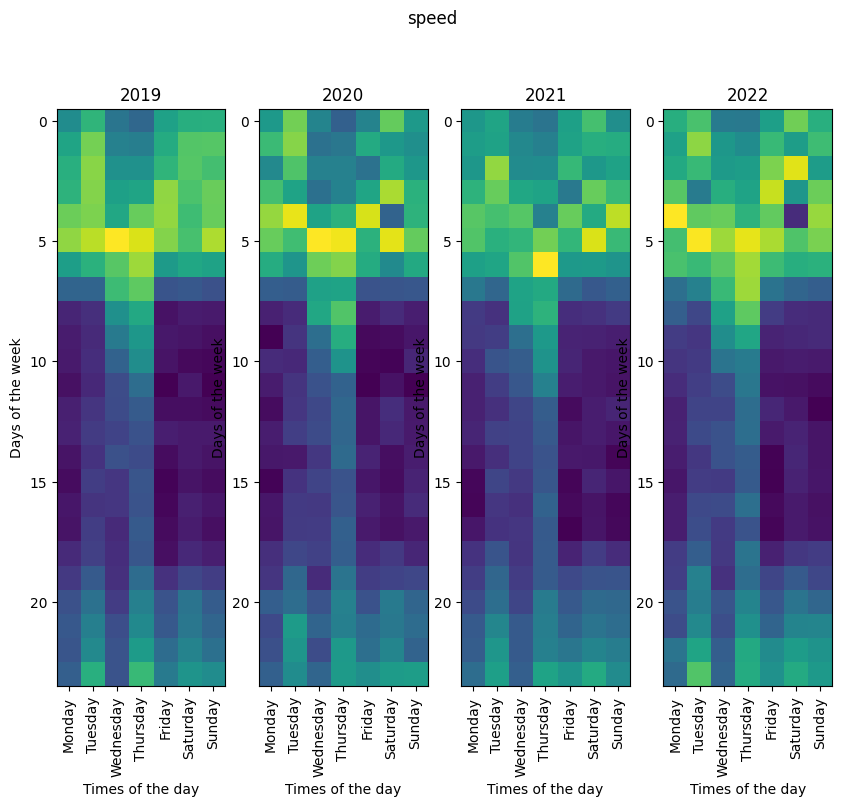

In [ ]:
weekday_cols = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axes = heatmap(df, ['pickup_hour', 'pickup_day'], "speed", 'Times of the day', 'Days of the week', weekday_cols, remove_outliers=True)
fig.set_size_inches(10, 8)

**Question: Which conclusions do you obtain from the heatmaps?**
    
> ANSWER

We had to remove outliers from the dataset to be able to visualize the data in a meaningful way, because extreme values where masking other structure in the matrix visualization. One could have tuned the v_min, v_max value of the imshow() function too, but I decided to remove extreme data based on z-scoring.

There are many conclusions to take. A few are:
Trips take more time during the day, altough they are much shorter.
People take longer trips at night. Probably taking long trips during the day is too expensive and too slow.

During COVID we can see a strong reduction on trip_distance and time (around march/april 2020).

Speed is highest around 5 am, and very low during the day, no matter which year.

## Numpy, Pandas and Matplotlib Sheets


**1. Python Basics**

1. **List Comprehensions**:

  A list comprehension provides a concise method to create lists by performing an operation on each item in an existing list (or other iterable), optionally filtering items based on a condition.

  Example: If you want to square all even numbers from 0 to 9:

  ```
  even_squares = [x**2 for x in range(10) if x % 2 == 0]
  ```

2. **NumPy**:

  - **'*np.unique()*'**: Returns the sorted unique elements of an array and can also return their counts if return_counts=True is specified.

    Example:
    ```
    numbers = np.array([1,2,3,3,4,4,4,5])
    unique, counts = np.unique(numbers, return_counts=True)
    ```




3. **Pandas**:

  - **Aggregation**:

      - *.groupby()*: Groups data by column values.
      - *.count()*: Counts non-null values.
      - *.mean()*: Calculates the mean.

        ```
        # Group by 'Age' and count the 'Name'
        grouped = df.groupby('Age')['Name'].count()
        ```
  - **Pivot Table**:

      - *.pivot_table()*: Reshapes data based on column values.

  - **Manipulation**:

      - *.value_counts()*: Returns the frequency of unique values in a Series.
      - *.unstack()*: Pivots a level of row/column labels.
      - *.fillna()*: Fills NA/NaN values with a specified value.


4. **Matplotlib (and Seaborn)**:

  - **Basic Plotting**:

      - *plt.bar()*: Bar chart.
      - *plt.scatter()*: Scatter plot.
      - *plt.plot()*: Line plot.
      - *plt.show()*: Display the plot.

  - **Subplots**: *plt.subplots()*: Creates a figure and a set of subplots.

  - **Styling**: Use functions like plt.xlabel(), plt.ylabel(), plt.title(), and plt.legend() to set titles, labels, and legends.

  - **Heatmaps**: Visual representation of data where individual values are represented as colors. Use plt.imshow() or sns.heatmap() to create a heatmap.

  - **Bar Charts**: Use plt.bar() to visualize data in the form of bars.

  - **Histograms**: Represents the frequency distribution of a dataset. Use plt.hist() or plt.bar() for histograms.

  - **Scatter Plots**: Depict relationships between two numerical variables. Use plt.scatter() to create scatter plots.